# Módulo 3: Histogramas + Box Plot 

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Solução do Desafio

## Objetivo:

#### Visualizar uma Distribuição Normal usando Histogramas e Box Plot


### Dataset:

In [5]:
serie_original = pd.Series(np.random.randn(900)) * 32 + 230 
outliers = pd.Series(np.random.randn(100)) * 320 + 230 

### [ A ] Exploração

#### Parte 1

Usar Histograma e Box Plot para visualizar:
* a **Série Original**
* os **Outliers**
* a **Série Original** e os **Outliers** na mesma janela

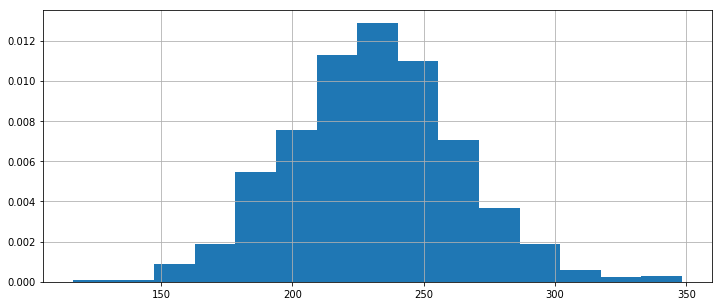

In [6]:
""" Original - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5))
plt.show()

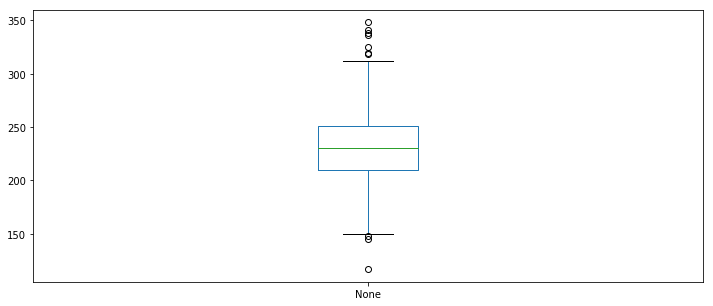

In [7]:
""" Original - boxplot """
serie_original.plot(kind="box", figsize=(12, 5))
plt.show()

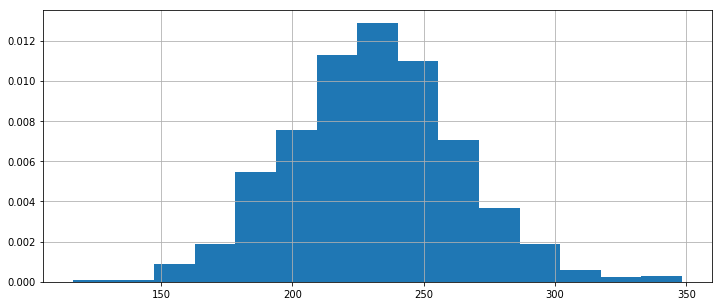

In [8]:
""" outliers - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5))
plt.show()

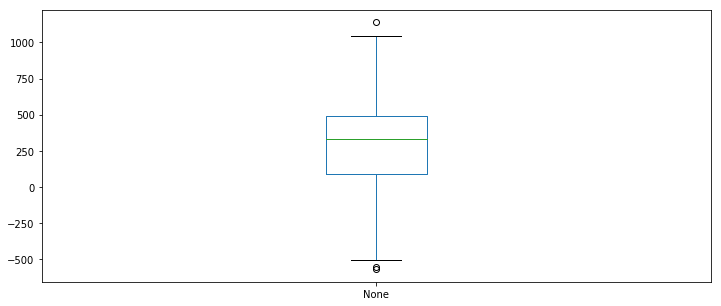

In [9]:
""" outliers - boxplot """
outliers.plot(kind="box", figsize=(12, 5))
plt.show()

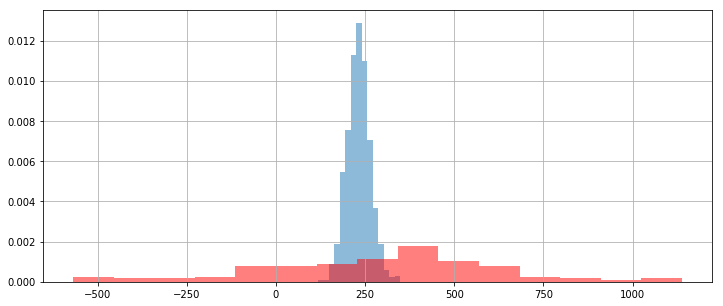

In [10]:
""" Original + Outliers - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5), alpha=0.5)
outliers.hist(bins=15, normed=True, color="red", ax=plt.gca(), alpha=0.5)
plt.show()

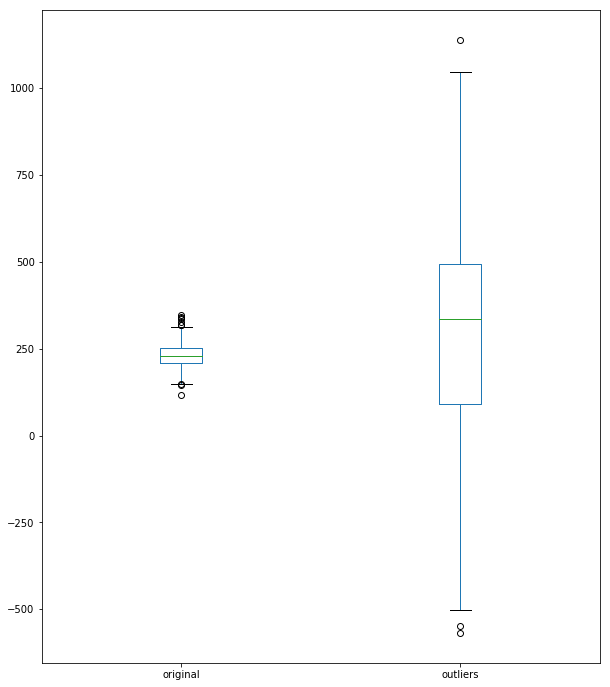

In [11]:
""" Original - boxplot """
pd.DataFrame({
    "original": serie_original,
    "outliers": outliers
}).plot(kind="box", figsize=(10, 12))
plt.show()

#### Parte 2

Juntar a **Série Original** com os **Outliers** para criar uma **Série Contaminada**. Visualizar a nova série.

Depois, propor cortes na série para eliminar os outliers sem perder muitos dados de dentro da distribuição.

Em cada corte executado, visualizar a distribuição e as medidas de constrole da distribuição.

In [12]:
""" juntando as series """
nova_serie = serie_original.append(outliers).reset_index(drop=True)

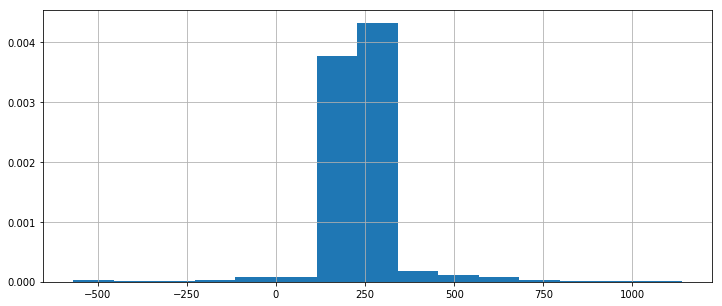

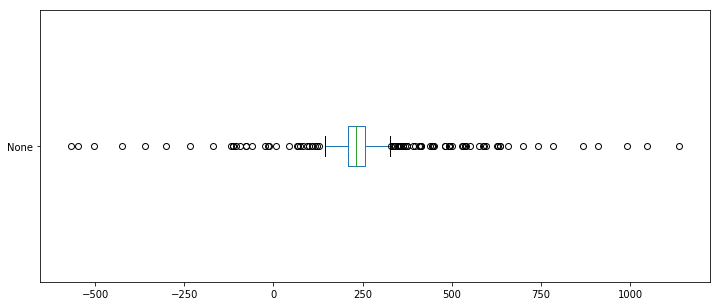

In [13]:
""" primeiro plot: visualizando tudo """
plt.figure(figsize=(12, 5))
nova_serie.hist(bins=15, normed=True)

plt.figure(figsize=(12, 5))
nova_serie.plot(kind="box", vert=False)
plt.show()

In [14]:
""" descrevendo as series original e nova """
pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie
}).describe()

,nova,original
count,1000.000000,900.000000
mean,236.868174,230.956627
std,110.057595,32.265429
min,-568.924285,116.581173
25%,208.561352,209.824432
50%,231.286818,230.082028
75%,255.481236,251.185199
max,1138.328438,348.245346


In [15]:
""" primeiro corte: quartis 25% & 75% """
tmp = nova_serie.loc[(nova_serie > 205.310242) & (nova_serie < 252.708219)]

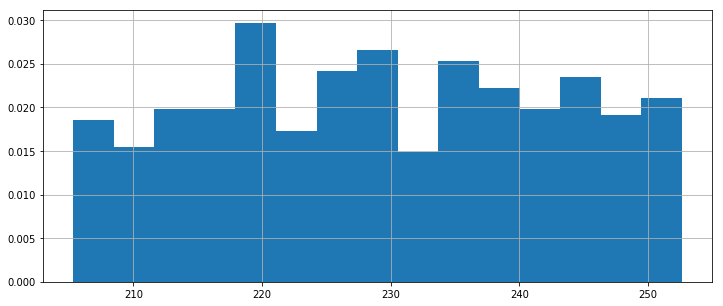

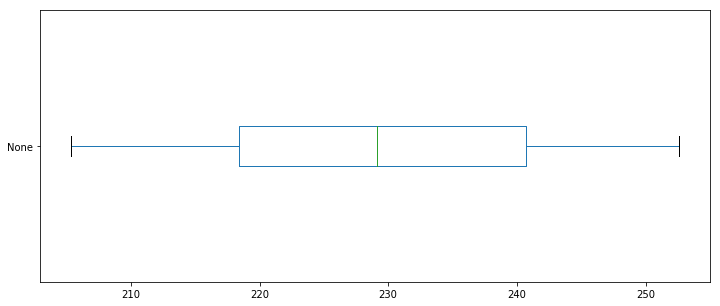

In [16]:
""" primeiro plot: visualizando tudo """
plt.figure(figsize=(12, 5))
tmp.hist(bins=15, normed=True)

plt.figure(figsize=(12, 5))
tmp.plot(kind="box", vert=False)

plt.show()

In [17]:
""" observa-se que o corte eliminou grande parte dos dados originais e deformou a distribuição """
pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie,
    "cortes": tmp
}).describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,cortes,nova,original
count,513.000000,1000.000000,900.000000
mean,229.375580,236.868174,230.956627
std,13.304436,110.057595,32.265429
min,205.322707,-568.924285,116.581173
10%,210.882277,184.316173,189.093762
25%,218.375907,208.561352,209.824432
50%,229.127342,231.286818,230.082028
75%,240.736642,255.481236,251.185199
90%,247.759021,284.299969,271.696742
max,252.628728,1138.328438,348.245346


In [18]:
""" segundo corte: 10% e 90% """
tmp = nova_serie.loc[(nova_serie > 179.788756) & (nova_serie < 277.723209)]

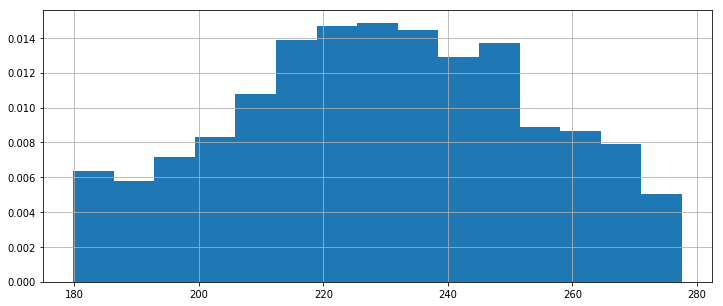

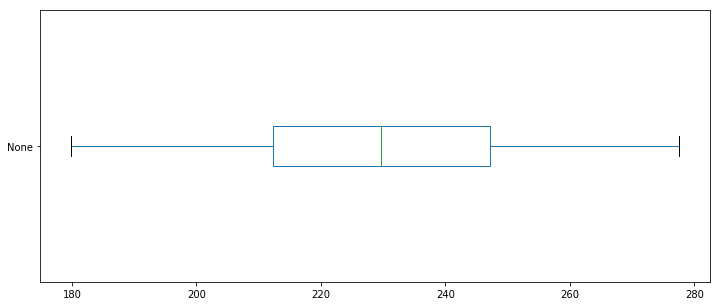

In [19]:
""" segundo plot: visualizando tudo """
plt.figure(figsize=(12, 5))
tmp.hist(bins=15, normed=True)

plt.figure(figsize=(12, 5))
tmp.plot(kind="box", vert=False)

plt.show()

In [20]:
""" o novo corte está mais próximo do original, mas ainda está afetando o desvio padrão """
pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie,
    "cortes": tmp
}).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,cortes,nova,original
count,795.000000,1000.000000,900.000000
mean,229.394345,236.868174,230.956627
std,23.905730,110.057595,32.265429
min,179.800650,-568.924285,116.581173
5%,188.312919,166.590810,179.290057
10%,196.161362,184.316173,189.093762
25%,212.317131,208.561352,209.824432
50%,229.632901,231.286818,230.082028
75%,247.122180,255.481236,251.185199
90%,261.857485,284.299969,271.696742


In [21]:
""" terceiro corte: 5% e 95% """
tmp = nova_serie.loc[(nova_serie > 153.746003) & (nova_serie < 307.717121)]

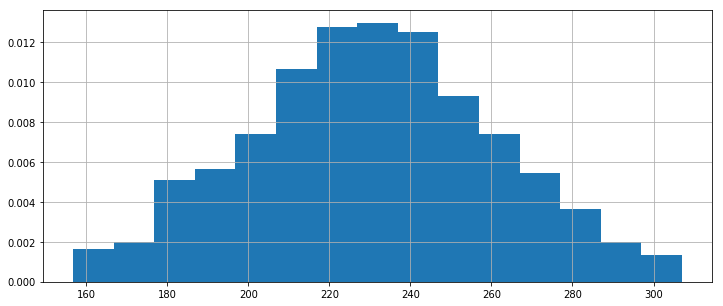

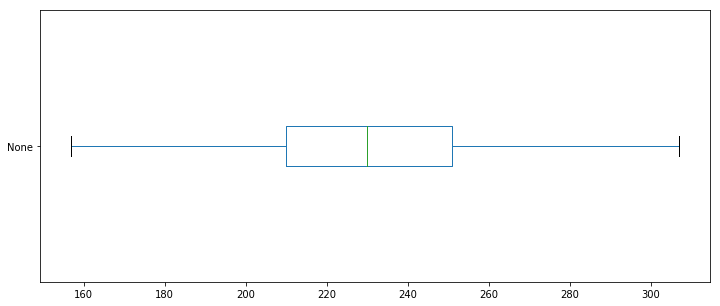

In [22]:
""" segundo plot: visualizando tudo """
plt.figure(figsize=(12, 5))
tmp.hist(bins=15, normed=True)

plt.figure(figsize=(12, 5))
tmp.plot(kind="box", vert=False)

plt.show()

In [23]:
""" o terceiro corte está muito mais próximo do original; observe a média e o desvio padrão """
pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie,
    "cortes": tmp
}).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,cortes,nova,original
count,901.000000,1000.000000,900.000000
mean,230.447419,236.868174,230.956627
std,30.410412,110.057595,32.265429
min,156.766769,-568.924285,116.581173
5%,179.800650,166.590810,179.290057
10%,189.696360,184.316173,189.093762
25%,210.015400,208.561352,209.824432
50%,229.985590,231.286818,230.082028
75%,250.838579,255.481236,251.185199
90%,269.857118,284.299969,271.696742


### [ B ] 

Criar um plot de duas janelas empilhadas na vertical, onde:
* A janela de cima é um **Box Plot horizontal**
* A Janela de baixo é um **histograma**

As duas janelas devem compartilhar o eixo horixontal, de forma que os atributos da distribuição estejam alinhados.

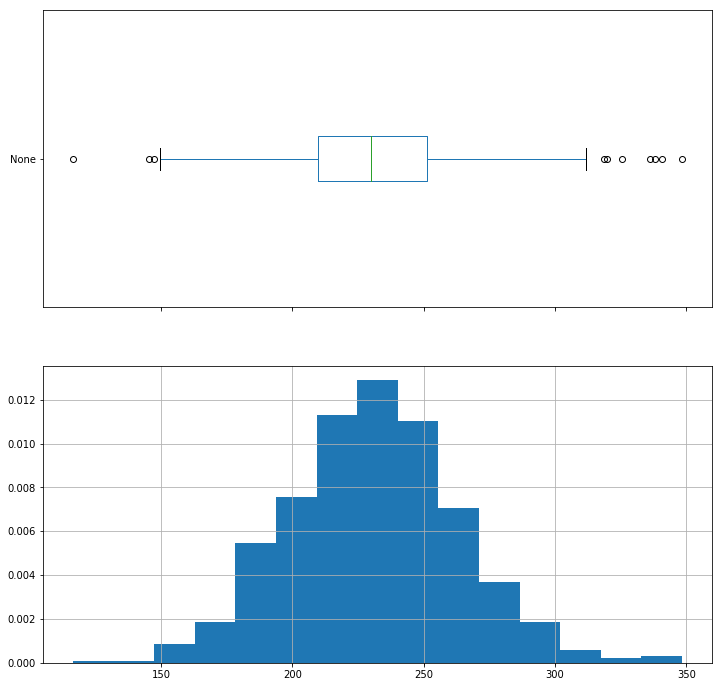

In [24]:
""" solução esperada """
f, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 12))

serie_original.plot(kind="box", vert=False, ax=ax[0])
serie_original.hist(bins=15, normed=True, ax=ax[1])

plt.show()

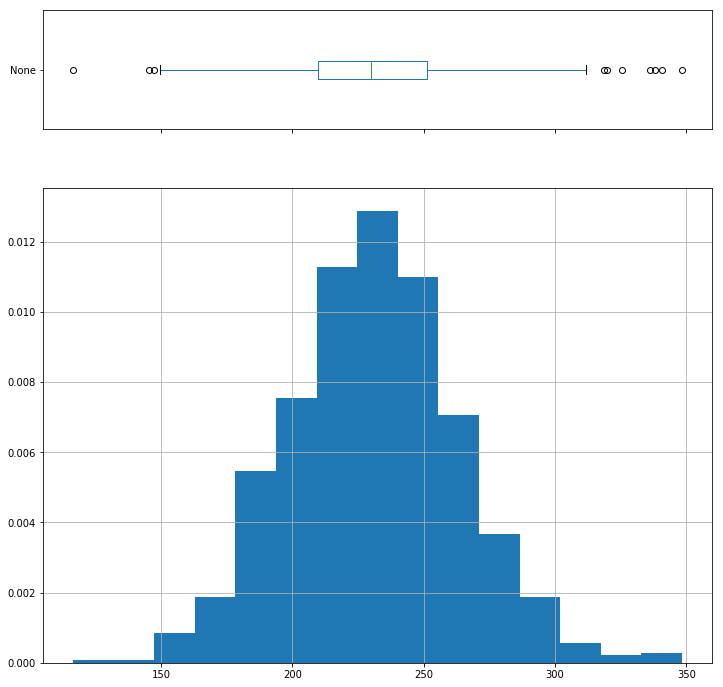

In [25]:
""" solução mais trabalhada """
f, ax = plt.subplots(
    2, 1, 
    sharex=True, 
    figsize=(12, 12), 
    gridspec_kw = {"height_ratios": [1, 4]}
)

serie_original.plot(kind="box", vert=False, ax=ax[0])
serie_original.hist(bins=15, normed=True, ax=ax[1])

plt.show()